In [1]:
import Pkg
Pkg.activate("..")

  Activating project at `~/unsupervised_aav2`


In [2]:
using JLD2, PyPlot, GaussianMixtures, BioSeqInt, Flux, Distributions

In [3]:
include("utils.jl")

binomial_threshold (generic function with 1 method)

# Data

sequences with counts < 100 are filtered out

In [4]:
file_experiment1 = load("../my_data/data_experiment1.jld2")
sequences_experiment1 = file_experiment1["sequences_experiment1"]
counts_experiment1 = file_experiment1["counts_experiment1"];

In [5]:
file_experiment2 = load("../my_data/data_experiment2.jld2")
sequences_experiment2 = file_experiment2["sequences_experiment2"]
counts_experiment2 = file_experiment2["counts_experiment2"];

In [6]:
file_experiment3 = load("../my_data/data_experiment3.jld2")
sequences_experiment3 = file_experiment3["sequences_experiment3"]
counts_experiment3 = file_experiment3["counts_experiment3"];

# log selectivities

In [7]:
θexperiment1 = [log(counts_experiment1[m,2] / counts_experiment1[m,1]) for m in axes(counts_experiment1, 1)];

In [8]:
θexperiment2 = [log(counts_experiment2[m,2] / counts_experiment2[m,1]) for m in axes(counts_experiment2, 1)];

In [9]:
θexperiment3 = [log(counts_experiment3[m,2] / counts_experiment3[m,1]) for m in axes(counts_experiment3, 1)];

In [10]:
θexperiment1 = filter(isfinite, θexperiment1);
θexperiment2 = filter(isfinite, θexperiment2)
θexperiment3 = filter(isfinite, θexperiment3);

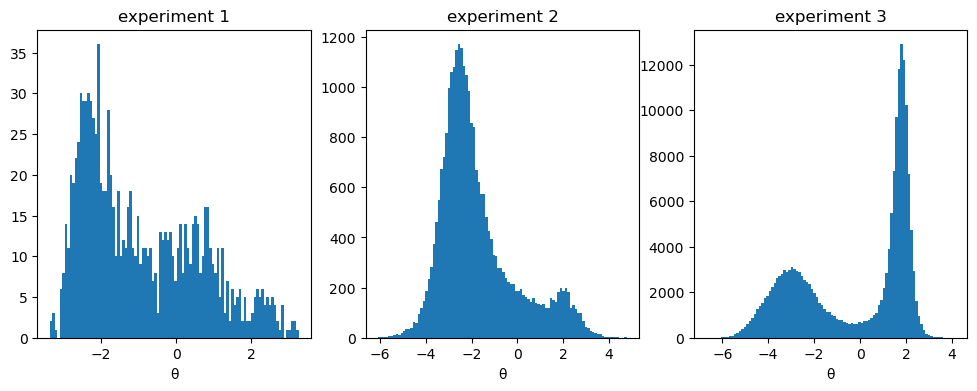

PyObject Text(0.5, 1.0, 'experiment 3')

In [11]:
fig, ax = subplots(1,3, figsize=(12,4))

ax[1].hist(filter(isfinite, θexperiment1), bins=100)
ax[1].set_xlabel("θ")
ax[1].set_title("experiment 1")

ax[2].hist(filter(isfinite, θexperiment2), bins=100)
ax[2].set_xlabel("θ")
ax[2].set_title("experiment 2")

ax[3].hist(filter(isfinite, θexperiment3), bins=100)
ax[3].set_xlabel("θ")
ax[3].set_title("experiment 3")

# thresholds fit

In [23]:
gmm1 = GMM(2,1)
gmm1.μ .+= randn(2,1)
gmm1.Σ .*= 1e-1;

In [24]:
em!(gmm1, reshape(θexperiment1, :, 1); nIter=120)

120-element Vector{Float64}:
 -12.867684075988336
  -1.7706697143364853
  -1.7472468066068985
  -1.7273199262090684
  -1.7140002469633637
  -1.7064292341371727
  -1.7017178942995062
  -1.6982559602556941
  -1.6954847036269753
  -1.6932008359558075
  -1.6913001897970452
  -1.6897126640532816
  -1.6883851168975272
   ⋮
  -1.6820536992792516
  -1.6820536992790207
  -1.6820536992788395
  -1.682053699278697
  -1.6820536992785853
  -1.6820536992784967
  -1.682053699278428
  -1.6820536992783732
  -1.6820536992783295
  -1.6820536992782968
  -1.6820536992782693
  -1.6820536992782487

In [25]:
gmm2 = GMM(2,1)
gmm2.μ .+= randn(2,1)
gmm2.Σ .*= 1e-1;

In [26]:
em!(gmm2, reshape(θexperiment2, :, 1), nIter=120)

120-element Vector{Float64}:
 -9.74458130825305
 -1.7635787199355968
 -1.7611424855493876
 -1.7608891695330717
 -1.7607946862053536
 -1.760725803628344
 -1.7606687427998604
 -1.760620591233153
 -1.760579771120918
 -1.7605450672411467
 -1.7605154882319483
 -1.7604902176321304
 -1.7604685802645088
  ⋮
 -1.760329310224752
 -1.760329310144171
 -1.7603293100730029
 -1.760329310010147
 -1.7603293099546315
 -1.7603293099055999
 -1.7603293098622945
 -1.7603293098240462
 -1.7603293097902657
 -1.7603293097604287
 -1.7603293097340769
 -1.7603293097108017

In [27]:
gmm3 = GMM(2,1)
gmm3.μ .+= randn(2,1)
gmm3.Σ .*= 1e-1;

In [28]:
em!(gmm3, reshape(θexperiment3, :, 1), nIter=120)

120-element Vector{Float64}:
 -27.61899830157018
  -1.9477908654082101
  -1.7533920366990488
  -1.7209317035336595
  -1.7192930156517297
  -1.7188487917062432
  -1.7186650280597513
  -1.7185869141081476
  -1.7185533439377048
  -1.718538816570088
  -1.718532501078931
  -1.7185297471780325
  -1.7185285438935387
   ⋮
  -1.7185276069864517
  -1.7185276069864506
  -1.7185276069864517
  -1.7185276069864506
  -1.7185276069864517
  -1.7185276069864506
  -1.7185276069864517
  -1.7185276069864506
  -1.7185276069864517
  -1.7185276069864506
  -1.7185276069864517
  -1.7185276069864506

In [29]:
function eval_gmm(gmm, x)
    g1 = Normal(gmm.μ[1,1], gmm.Σ[1,1])
    g2 = Normal(gmm.μ[2,1], gmm.Σ[2,1])
    g = MixtureModel([g1, g2], gmm.w)
    return pdf.(g, x)
end

eval_gmm (generic function with 1 method)

In [30]:
x1 = LinRange(-3,3,100)
x2 = LinRange(-7,5,100)
x3 = LinRange(-7,5,100);

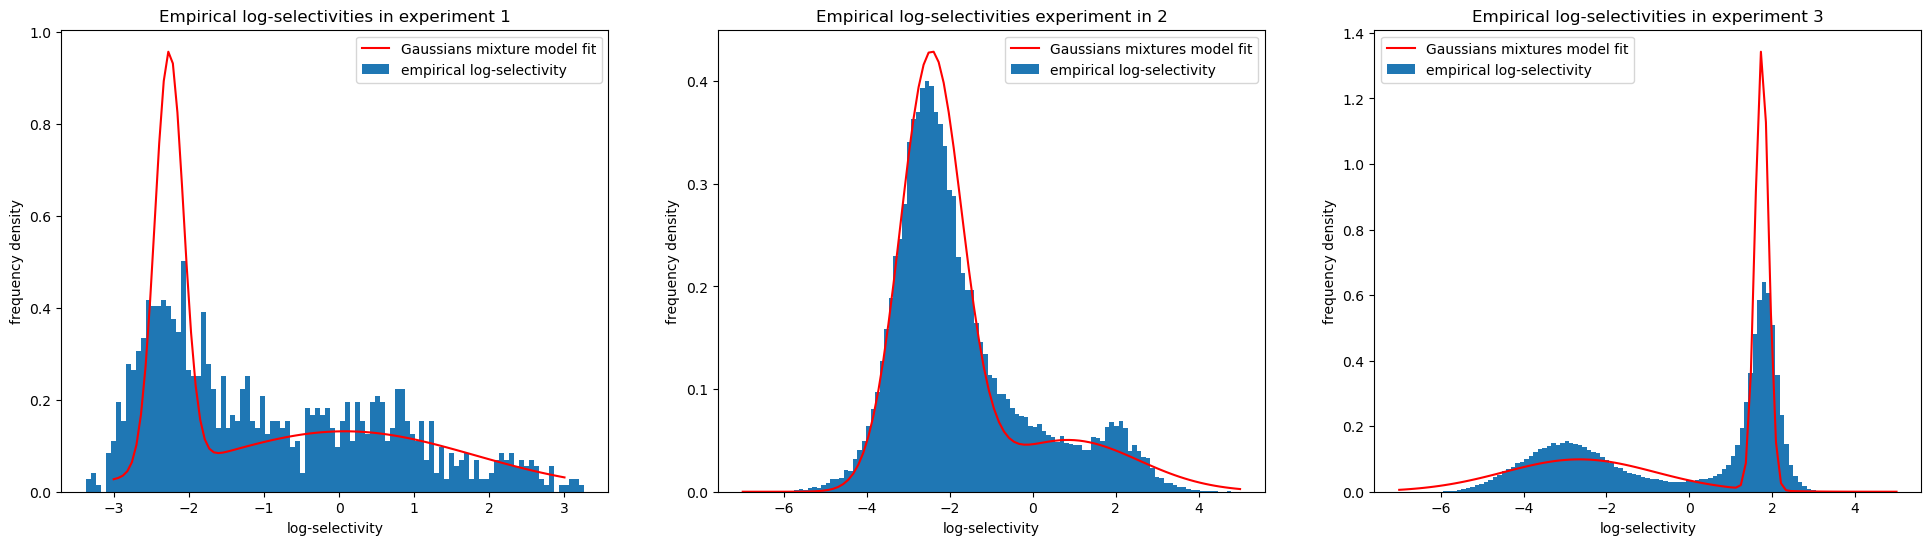

In [36]:
fig, ax = subplots(1,3, figsize=(24,6))

ax[1].plot(x1, eval_gmm(gmm1, x1), color="red")
ax[1].hist(θexperiment1, bins=100, density=true)
ax[1].set_xlabel("log-selectivity")
ax[1].set_ylabel("frequency density")
ax[1].legend(["Gaussians mixture model fit", "empirical log-selectivity"])
ax[1].set_title("Empirical log-selectivities in experiment 1")

ax[2].hist(θexperiment2, bins=100, density=true)
ax[2].plot(x2, eval_gmm(gmm2, x2), color="red")
ax[2].set_xlabel("log-selectivity")
ax[2].set_ylabel("frequency density")
ax[2].legend(["Gaussians mixtures model fit", "empirical log-selectivity"])
ax[2].set_title("Empirical log-selectivities experiment in 2")

ax[3].hist(θexperiment3, bins=100, density=true)
ax[3].plot(x3, eval_gmm(gmm3, x3), color="red")
ax[3].set_xlabel("log-selectivity")
ax[3].set_ylabel("frequency density")
ax[3].legend(["Gaussians mixtures model fit", "empirical log-selectivity"])
ax[3].set_title("Empirical log-selectivities in experiment 3")
savefig("../figures/fit.pdf", format="pdf")

In [ ]:
function intersections(gmm)
    m1 = gmm.μ[1,1]
    m2 = gmm.μ[2,1]
    s1 = gmm.Σ[1,1]
    s2 = gmm.Σ[2,1]
    w1 = gmm.w[1]
    w2 = gmm.w[2]
    
    a = s2^2 - s1^2
    b = m1*s2^2 - m2*s1^2
    c = m1^2*s2^2 - m2^2*s1^2 + 2*s1^2*s2^2*log((w2/w1)*(s1/s2))
    
    x1 = (b + sqrt(b^2-a*c))/a
    x2 = (b - sqrt(b^2-a*c))/a
    
    return x1,x2
end

In [ ]:
xa_1,xb_1 =intersections(gmm1)

In [ ]:
xa_2,xb_2 =intersections(gmm2)

In [ ]:
xa_3,xb_3 =intersections(gmm3)

In [ ]:
function find_valley(gmm, resolution::Int)
    xmin = gmm.μ[1,1]
    xmax = gmm.μ[2,1]
    r = LinRange(xmin, xmax, resolution)
    y = eval_gmm(gmm, r)
    xvalley = argmin(y)
    return r[xvalley]
end

In [ ]:
find_valley(gmm1, 100)

In [ ]:
find_valley(gmm2, 100)

In [ ]:
find_valley(gmm3, 100)